<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo III: Aprendizaje supervizado: Máquinas de Vector Soporte

Generalmente, `Support Vector Machines` se considera un algoritmo de aprendizaje supervizado para clasificación, pero puede emplearse en ambos tipos de problemas de clasificación y regresión. 

>Puede manejar fácilmente múltiples variables continuas y categóricas.

>SVM construye un hiperplano en un espacio multidimensional para separar diferentes clases.

>SVM genera un hiperplano óptimo de manera iterativa, que se utiliza para minimizar un error. La idea central de SVM es encontrar un hiperplano marginal máximo (MMH) que divida mejor el conjunto de datos en clases.

> **Vectores Soportes:** Los vectores de soporte son los puntos de datos más cercanos al hiperplano. Estos puntos definirán mejor la línea de separación calculando los márgenes. Estos puntos son más relevantes para la construcción del clasificador.

> **Hiperplano:** Un hiperplano es un plano de decisión que separa un conjunto de objetos que tienen diferentes membresías de clase.

>**Margen:** Un margen es un espacio que existe entre dos líneas obtenidas en función de los puntos de cada clase. Esto se calcula como la distancia perpendicular desde la línea hasta los vectores soporte o los puntos más cercanos. Si el margen es mayor entre las clases, entonces se considera un buen margen, un margen más pequeño es un mal margen.


### Algoritmo
El objetivo principal es segregar el conjunto de datos dado de la mejor manera posible. La distancia entre los puntos más cercanos se conoce como margen. El objetivo es seleccionar un hiperplano con el máximo margen posible entre los vectores de soporte en el conjunto de datos dado. SVM busca el hiperplano marginal máximo.

1. Basada en kernels que realiza clasificación lineal sobre vectores transformados a un espacio de dimensión superior, es decir, separa mediante un hiperplano en el espacio transformado.

2. Encuentra el hiperplano que maximiza el “margen” entre dos clases

El objetivo de este algoritmo es encontrar un hiperplano un un espacio N-dimensional (N = número de variables) que clasifica datos

Se busca encontrar un hiperplano que tenga el margen máximo (máxima distancia) entre los puntos de ambas clases. 

<img style="float: center; margin: 15px 15px 0px 0px;" src="https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png" width="250px" height="80px" />

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png" width="250px" height="80px" />



**Se necesita optimizar la siguiente función de costo**

$$
\min _{\mathbf{w}, b}\|\mathbf{w}\|^{2}+C \sum_{i=1}^{n} \xi_{i}^{p} \text { under constraints } y_{i}\left(\mathbf{w} \cdot \mathbf{x}_{i}+b\right) \geq 1-\xi_{i}, \quad \xi_{i} \geq 0
$$


**El truco del Kernel**

No todos los datos son linealmente separables, casi todos los datos están aleatoriamente distribuidos, lo cual hace difícil separar linealmente los datos. 

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png" width="450px" height="280px" />

En escencia, lo que hace el truco del kernel es ofrecer una manera más eficiente y menos costosa de aumentar la dimensionalidad de los datos. 

**Algunos tipos de kernel**
- Lineal
$$K(x,x*)=x \cdot x^{*}$$
- Polinomial 
$$K(x,x*)=(x \cdot x^{*} +1)^{d}$$
- Gaussian Radial Basis 
$$K(x,x*)=\exp^{-\frac{\|x-x^{*}\|^{2}}{2\sigma^{2}}}=\exp^{-\gamma\|x-x^{*}\|^{2}} $$

**Se deben cumplir varias cosas para obtener el resultado óptimo:**

- Este algoritmo funciona muy bien si se tienen los datos limpios. Si los datos están muy dispersos no se podrá crear una fórmula adecuada. Se recomienda estandarizar los datos previamente. 
- No es adecuado para conjuntos de datos grandes. Lleva mucho tiempo el entrenamiento
- Menos efectivo en conjuntos de datos con columnas superpuestas


La linea que maximiza ese margen es la que se escoge como el modelo óptimo. 

## Ejemplo 1: Datos Linealmente separables

In [7]:
#%% Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import (accuracy_score, precision_score, recall_score)

In [8]:
#Genrar los datos para entrenar un modelo de SVM
np.random.seed(103)
X = np.r_[np.random.randn(20,2) - [2,2],
          np.random.randn(20,2) + [2,2]]
Y = [0]*20 + [1]*20

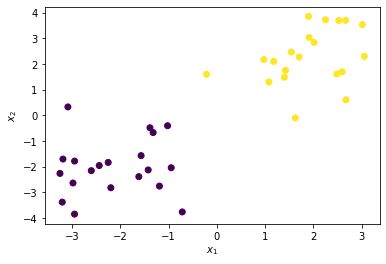

In [10]:
#Visualizar el conjunto de datos
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [11]:
#Crear un modelo SVM con sklearn
modelo = svm.SVC(kernel = 'linear')
modelo.fit(X,Y)
yhat = modelo.predict(X)

In [12]:
len(yhat ), len(Y)

(40, 40)

In [15]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
print(f'Accuracy: {accuracy_score(Y, yhat)}')
print(f'Recall: {recall_score(Y, yhat)}')
print(f'Precision: {precision_score(Y, yhat)}')

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [17]:
modelo.coef_

array([[0.67187   , 0.72857706]])

In [18]:
modelo.intercept_

array([-0.018534])

In [19]:
modelo.support_vectors_

array([[-1.02105214, -0.40507846],
       [ 1.62270881, -0.09865229],
       [-0.21274675,  1.59394494]])

In [20]:
#Dibujar el hiperplano obtenido 
w = modelo.coef_[0]
m = -w[0]/w[1]

xx = np.linspace(-5,5)
yy = m*xx - (modelo.intercept_[0]/w[1])

vs = modelo.support_vectors_

#Margenes apartir de los vectores soportes
b = vs[0]
yy_abajo = m*xx + (b[1] - m*b[0])

b = vs[-1]
yy_arriba = m*xx + (b[1] - m*b[0])


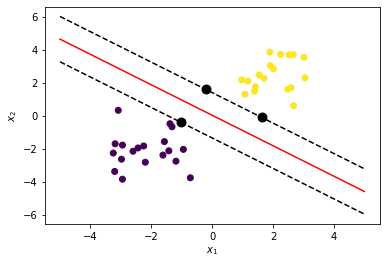

In [24]:
#Visualizar el conjunto de datos
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(xx,yy, 'r')
plt.plot(xx,yy_arriba, 'k--')
plt.plot(xx,yy_abajo, 'k--')
plt.scatter(vs[:,0], vs[:,1], s=80, facecolor='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [25]:
w_norm = np.linalg.norm(modelo.coef_)
w_norm

0.9910771028970338

In [27]:
dist = yy/w_norm
max(dist)

4.678016994112768

## Ejemplo 2: Tratar con datos que no son linealmente separables

In [29]:
# importar los datos 
data = pd.read_csv('../Data/ex2data2.txt', header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [31]:
X = data.iloc[:,:2]
Y = data.iloc[:,-1]

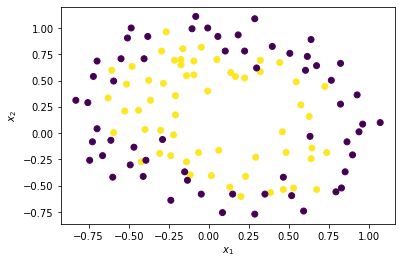

In [32]:
plt.figure(figsize=(6,4))
plt.scatter(X[0], X[1], c=Y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Algunos problemas no se pueden resolver utilizando un hiperplano lineal.

>En tal situación, **SVM** usa un truco del kernel para transformar el espacio de entrada en un espacio dimensional más grande. 

**SVM Kernels**

El algoritmo SVM se implementa en la práctica utilizando un kernel. 

>Un **kernel** transforma un espacio de datos de entrada en la forma requerida. Aquí, el kernel toma un espacio de entrada de menor dimensión y lo transforma en un espacio de mayor dimensión. En otras palabras, se puede decir que se convierte un problema no linealmente separable en problemas separables al agregarle una mayor dimensión. 

**Kernel lineal** Se puede utilizar un kernel lineal como producto escalar normal cualesquiera dos observaciones dadas. El producto entre dos vectores es la suma de la multiplicación de cada par de valores de entrada.

$$K(x,x_i) = \sum(x*x_i) $$


**Kernel polinomial** Un kernel polinomial es una forma más generalizada del kernel lineal. El kernel polinomial puede distinguir el espacio de entrada curvo o no lineal.

$$K(x,x_i) = 1 \sum(x*x_i)^d $$

Donde $d$ es el grado del polinomio. $d = 1$ es similar a la transformación lineal. 

**Kernel de función de base radial (RBF)** RBF puede mapear un espacio de entrada en un espacio dimensional infinito.

$$K(x,x_i) = exp(-\gamma * \sum(x – x_i^2))$$

In [33]:
#%% Crear y entrenar el modelo SVM rbf
modelo = svm.SVC(kernel='rbf')
modelo.fit(X,Y)
yhat_svm = modelo.predict(X)


In [34]:
print(f'Accuracy: {accuracy_score(Y, yhat_svm)}')
print(f'Recall: {recall_score(Y, yhat_svm)}')
print(f'Precision: {precision_score(Y, yhat_svm)}')

Accuracy: 0.847457627118644
Recall: 0.8103448275862069
Precision: 0.8703703703703703


In [35]:
#%% Crear y entrenar el modelo SVM polinomial
modelo = svm.SVC(kernel='poly', degree=2)
modelo.fit(X,Y)
yhat_svm = modelo.predict(X)

print(f'Accuracy: {accuracy_score(Y, yhat_svm)}')
print(f'Recall: {recall_score(Y, yhat_svm)}')
print(f'Precision: {precision_score(Y, yhat_svm)}')

Accuracy: 0.7457627118644068
Recall: 0.8275862068965517
Precision: 0.7058823529411765


In [36]:
#%% Crear y entrenar el modelo SVM polinomial
modelo = svm.SVC(kernel='linear')
modelo.fit(X,Y)
yhat_svm = modelo.predict(X)

print(f'Accuracy: {accuracy_score(Y, yhat_svm)}')
print(f'Recall: {recall_score(Y, yhat_svm)}')
print(f'Precision: {precision_score(Y, yhat_svm)}')

Accuracy: 0.5508474576271186
Recall: 0.6379310344827587
Precision: 0.5362318840579711


## Ejemplo 3: 

In [37]:
#Cargar los datos de un conjuto de datos en sklearn, datos Iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [40]:
#Cargando los datos de Iris
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [41]:
# Obtener un conjunto de datos para entenar y un conjunto de datos para testear
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [42]:
#Estandarizar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [44]:
#Entrenear al modelo SVM
model = svm.SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X_train_std, y_train)

SVC(kernel='linear')

In [54]:
from sklearn.metrics import classification_report
#Evaluar al modelo entrenado con Xtrain
y_pred = model.predict(X_train_std)
print(f'Accuracy: {accuracy_score(y_train, y_pred)}')
#Imprimir un reporte de clasificación
print(f'Reporte de clasificación: \n{classification_report(y_train,y_pred, target_names = iris.target_names)}')

Accuracy: 0.9833333333333333
Reporte de clasificación: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      0.95      0.97        41
   virginica       0.95      1.00      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [53]:
#Evaluar al modelo entrenado
y_pred = model.predict(X_test_std)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
#Imprimir un reporte de clasificación
print(f'Reporte de clasificación:\n {classification_report(y_test,y_pred, target_names = iris.target_names)}')

Accuracy: 0.9
Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.80      0.89      0.84         9
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



### Actividad1:

In [4]:
import pandas as pd
data = pd.read_csv("../Data/apples_and_oranges.csv")
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


### Actividad 2:

In [55]:
from sklearn import datasets
# Cargar el dataset Wine
wine = datasets.load_wine()


In [58]:
X = wine.data
Y = wine.target

In [59]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])